In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # For image reading and processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models


In [38]:
# Load the metadata CSV
metadata_path = '/content/drive/MyDrive/skin cancer dataset/HAM10000_metadata.csv'
df = pd.read_csv(metadata_path)

# Check the first few rows to understand the structure
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [39]:
# Extract relevant columns
df = df[['image_id', 'dx']]  # Replace 'dx' with the appropriate target column
df['label'] = LabelEncoder().fit_transform(df['dx'])  # Encode labels as integers

<ipython-input-39-08d1f8127884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = LabelEncoder().fit_transform(df['dx'])  # Encode labels as integers


<ipython-input-55-67979f502f5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dx', palette='Set2')


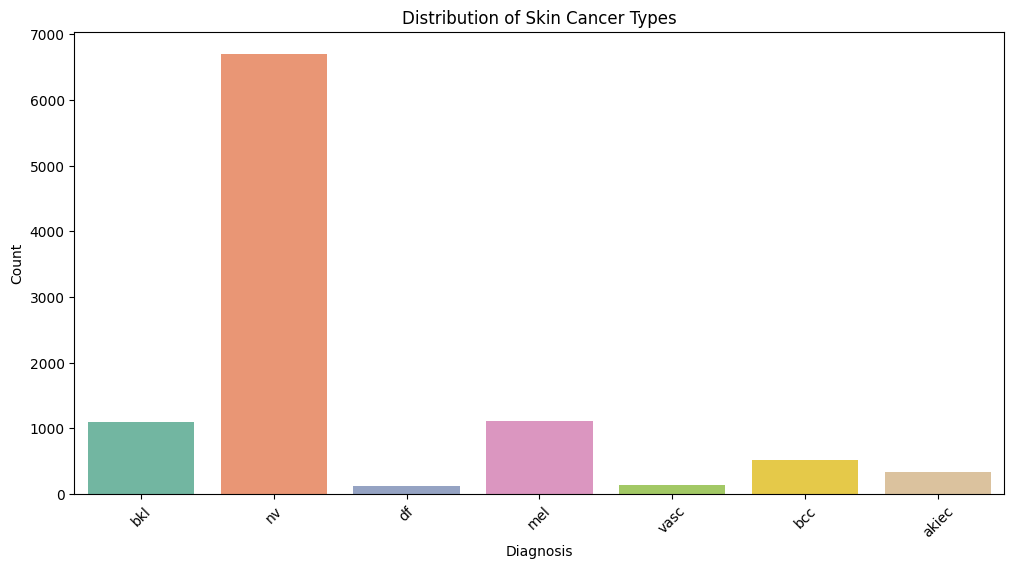

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='dx', palette='Set2')
plt.title('Distribution of Skin Cancer Types')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Image not found: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0030070.jpg


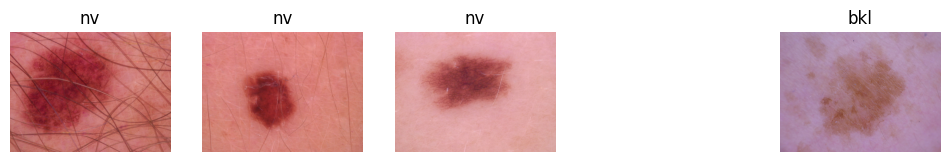

In [52]:
df = pd.read_csv('/content/drive/MyDrive/skin cancer dataset/HAM10000_metadata.csv')

# Sample images display
sample_images = df.sample(5)  # Randomly pick 5 images
plt.figure(figsize=(12, 8))

for i, (idx, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join('/content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1', f"{row['image_id']}.jpg")

    # Check if the image exists and load it
    if os.path.exists(img_path):
        img = cv2.imread(img_path)

        # Ensure the image is loaded successfully
        if img is None:
            print(f"Unable to load image: {img_path}")
            continue  # Skip this image if it's corrupted

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(row['dx'])
        plt.axis('off')
    else:
        print(f"Image not found: {img_path}")

plt.show()


In [11]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess the images
def load_and_preprocess_images(df, image_dir, image_size=(224, 224)):
    X = []
    y = []

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, f"{row['image_id']}.jpg")

        # Debug: Print the image path being loaded
        print(f"Loading image from: {img_path}")

        # Check if the image exists
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        img = cv2.imread(img_path)

        # Check if image was successfully read
        if img is None:
            print(f"Error reading image: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        img = cv2.resize(img, image_size)  # Resize image to 224x224
        img = img / 255.0  # Normalize pixel values to [0, 1]

        X.append(img)
        y.append(row['dx'])  # Correct column name for diagnosis labels

    return np.array(X), np.array(y)

# Load the dataset (assuming your CSV is loaded in the 'df' DataFrame)
# Make sure 'df' has the 'image_id' and 'dx' columns

# Sample dataset loading (replace with your actual dataframe loading code)
df = pd.read_csv('/content/drive/MyDrive/skin cancer dataset/HAM10000_metadata.csv')  # Adjust path accordingly

# Only consider the first 1000 samples (to reduce the dataset size)
df = df.head(1000)

# Load and preprocess images
X, y = load_and_preprocess_images(df, '/content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1')

# Check the output shape
print(X.shape, y.shape)

# Encode the labels (if they're categorical like 'benign', 'malignant', etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels as integers

# For multi-class problems, use one-hot encoding
y_encoded = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check shapes of the split data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Now, you can proceed to train the model


Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0027419.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0025030.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0026769.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0025661.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0031633.jpg
Image not found: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0031633.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0027850.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0029176.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_images_part_1/ISIC_0029068.jpg
Loading image from: /content/drive/MyDrive/skin cancer dataset/HAM10000_imag

In [22]:
# Build the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(df['dx'].unique()), activation='softmax')  # Softmax for multi-class classification, use 'dx'
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.9996 - loss: 0.2508 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.9988 - loss: 0.0444 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9982 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 3.0684e-06
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9927 - loss: 0.1005 - val_accuracy: 1.0000 - val_loss: 1.6658e-04
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9996 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 4.5072e-05
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9961 - loss: 0.0381 - val_accuracy: 1.0000 - val_loss: 4.2565e-05
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9974 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9949 - loss: 0.0395 - val_accuracy

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 2.6989e-04
Test Accuracy: 100.00%


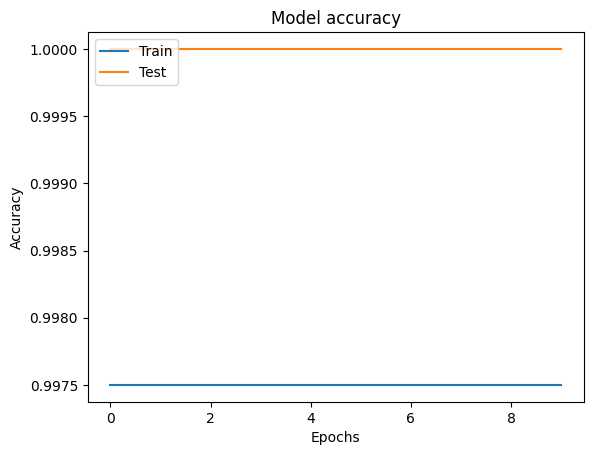

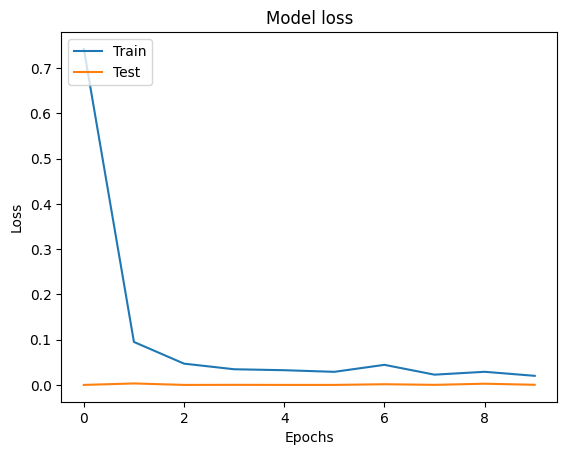

In [54]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [26]:
model.save("skin_cancer_model.h5")